## Задача 1. 
Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks):
zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]  
ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]  
Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression

In [3]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

### 1. Без intercept

In [4]:
r = np.corrcoef(zp, ks)
r[0][1]

0.8874900920739162

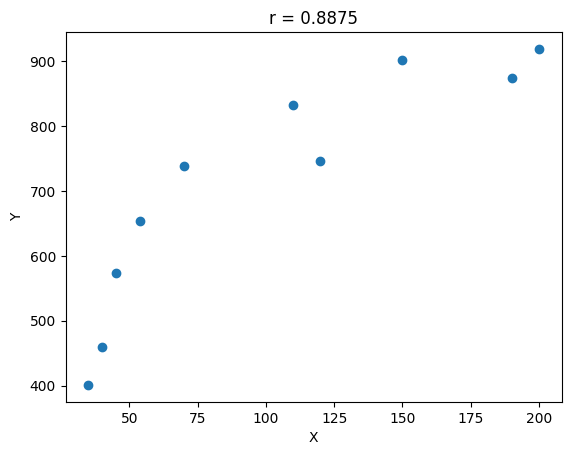

In [5]:
plt.scatter(zp, ks)
plt.title(f'r = {round(r[0][1], 4)}')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Из графика видно, что можно предположить о наличии некоей линейной взаимосви:  
Линейная зависимость: $ \bar y=b_1+b_0\cdot \bar x$  
Парная регрессия: $b_0=\frac{\bar{xy}-\bar x\cdot\bar y}{\bar{x^2}-{\bar x}^2}$ и $b_1=\bar y-b_0\cdot\bar x$  

In [6]:
b0 = (np.mean(zp * ks) - np.mean(zp) * np.mean(ks)) / (np.mean(zp**2) - np.mean(zp) ** 2)
b1 = np.mean(ks) - b0 * np.mean(zp)

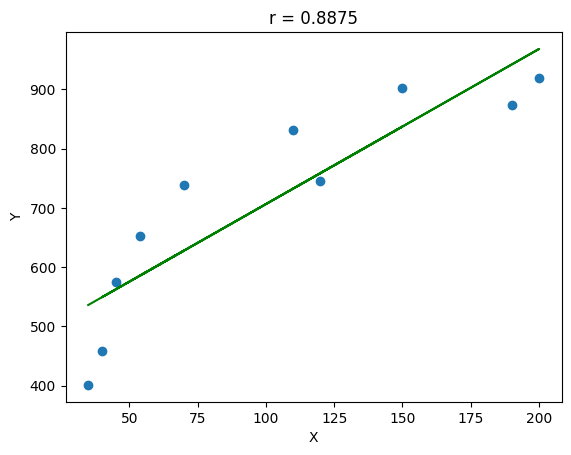

In [7]:
plt.scatter(zp, ks)
plt.plot(zp, b1 + b0 * zp, c='g')
plt.title(f'r = {round(r[0][1], 4)}')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

График наглядно показывает линейную взаимосвязь между величиной заработной платы и значением кредитного скоринга.

### 2. С помощью intercept

In [8]:
model = LinearRegression() # зададим модель линейной регрессии
zp = zp.reshape(-1,1) # делаем массив zp двумерным атрибутом 
regres = model.fit(zp, ks) # подбираем коэффициенты
const = regres.intercept_
beta = regres.coef_
r_sq = model.score(zp, ks)
print(const) # выводим интерсепрт
print(beta) # выводим коэффициенты
print(r_sq)

444.17735732435943
[2.62053888]
0.7876386635293686


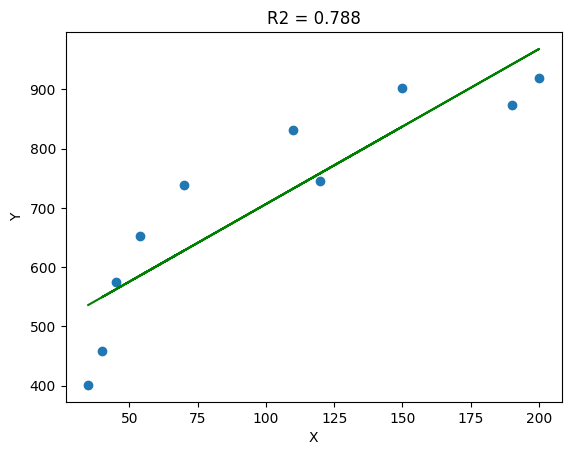

In [9]:
plt.scatter(zp, ks)
plt.plot(zp, const + beta * zp, c='g')
plt.title(f'R2 = {round(r_sq, 3)}')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()